In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import pickle

In [2]:
#loading the dataset into pandas dataframe
df = pd.read_csv('heart_disease.csv')
print(df.head())
print(df.isnull().sum())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   1       145   233    1        2      150      0      2.3      3   
1   67    1   4       160   286    0        2      108      1      1.5      2   
2   67    1   4       120   229    0        2      129      1      2.6      2   
3   37    1   3       130   250    0        0      187      0      3.5      3   
4   41    0   2       130   204    0        2      172      0      1.4      1   

    ca  thal  num  
0  0.0   6.0    0  
1  3.0   3.0    2  
2  2.0   7.0    1  
3  0.0   3.0    0  
4  0.0   3.0    0  
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
num         0
dtype: int64


In [3]:
#defining columns
categorical_cols = ['sex','cp','fbs','restecg','exang','slope','thal']
numerical_cols = ['age','trestbps','chol','thalach','oldpeak','ca']
target = ['num']

In [4]:
#defining pipeline
numerical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])
categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [5]:
#defining preprocessing
preprocessing = ColumnTransformer(transformers=[
    ('num', numerical_pipeline, numerical_cols),
    ('cat', categorical_pipeline, categorical_cols),
    ('pass', 'passthrough', target)
])

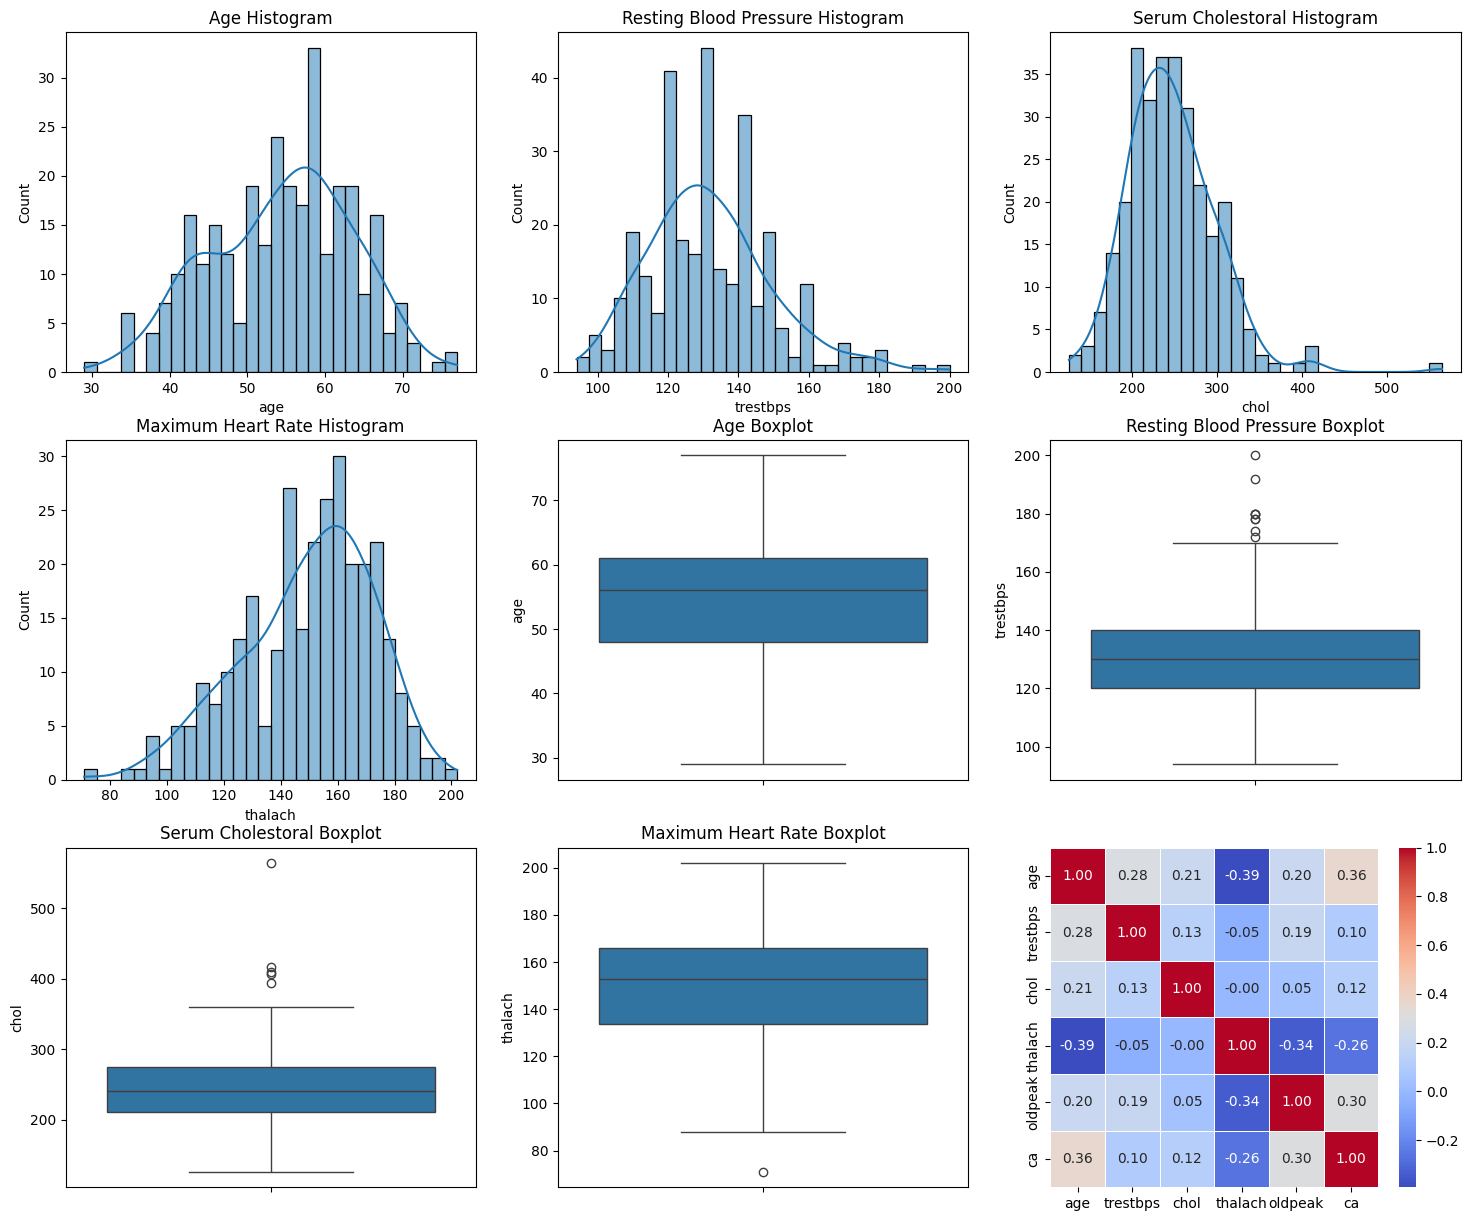

In [6]:
#EDA
fig, axes = plt.subplots(3, 3, figsize=(18, 15))
sns.histplot(data=df, x='age', bins=30, kde=True,ax=axes[0,0])
sns.histplot(data=df, x='trestbps', bins=30, kde=True,ax=axes[0,1])
sns.histplot(data=df, x='chol', bins=30, kde=True,ax=axes[0,2])
sns.histplot(data=df, x='thalach', bins=30, kde=True,ax=axes[1,0])
axes[0,0].set_title('Age Histogram')
axes[0,1].set_title('Resting Blood Pressure Histogram')
axes[0,2].set_title('Serum Cholestoral Histogram')
axes[1,0].set_title('Maximum Heart Rate Histogram')
sns.boxplot(y=df['age'],ax=axes[1,1])
sns.boxplot(y=df['trestbps'],ax=axes[1,2])
sns.boxplot(y=df['chol'],ax=axes[2,0])
sns.boxplot(y=df['thalach'],ax=axes[2,1])
axes[1,1].set_title('Age Boxplot')
axes[1,2].set_title('Resting Blood Pressure Boxplot')
axes[2,0].set_title('Serum Cholestoral Boxplot')
axes[2,1].set_title('Maximum Heart Rate Boxplot')
corr = df[numerical_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5,ax=axes[2,2])
plt.show()

In [7]:
#Preprocessing the dataset then getting it back to a dataframe not nparray
df_preprocessed = preprocessing.fit_transform(df)
num_features = preprocessing.named_transformers_['num'].named_steps['scaler'].get_feature_names_out(numerical_cols)
cat_features = preprocessing.named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(categorical_cols)
pass_features = target
all_feature_names = np.concatenate([num_features, cat_features, pass_features])
df_preprocessed = pd.DataFrame(df_preprocessed, columns=all_feature_names)
#Making num(target) as 0,1 only for better clasification
df_preprocessed['num'] = np.where(df_preprocessed['num'] == 0, 0, 1)

In [8]:
#Saving the preprocessing pipeline and preprocessed dataframe
with open('saved_preprocessors/preprocessing.pkl', 'wb') as f:
    pickle.dump(preprocessing, f)
with open('saved_data/df_preprocessed.pkl', 'wb') as f:
    df_preprocessed.to_pickle(f)